In [1]:
s = 'foo'
s in 'That is food for thought.'

True

In [2]:
s in 'That is good for now.'

False

In [3]:
s not in 'That is good for now.'

True

문자열 관련 함수

In [4]:
ord('a')

97

In [5]:
chr(44032)

'가'

In [6]:
len('안녕하세요')

5

In [7]:
str(42)

'42'

문자열 메소드

In [8]:
s = 'foobar'

In [9]:
s.count('o')

2

In [10]:
s.find('b')

3

In [11]:
s.startswith('f')

True

In [12]:
x = '    hello   '

In [13]:
x.strip()

'hello'

# 문서 단어 행렬

In [14]:
import pandas as pd
df = pd.read_excel('data/yelp.xlsx')

In [15]:
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [16]:
df.shape

(1000, 2)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english')

불용어

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#ENGLISH_STOP_WORDS

In [19]:
stop_words = ENGLISH_STOP_WORDS | {'my_stop_word'}

In [20]:
#stop_words

In [21]:
dtm = cv.fit_transform(df['review'])

In [22]:
dtm.shape

(1000, 500)

In [23]:
cv.get_feature_names_out()

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

단어 빈도

In [24]:
dtm.sum(axis=0)

matrix([[  5,   2,   2,   4,   5,   3,   4,   8,   3,  24,   7,   3,   5,
           7,   3,   4,   5,   3,  11,   7,   6,   4,   5,   5,  12,   3,
           5,  18,   7,   5,   2,   3,   2,   4,   3,   4,   3,   5,   8,
           3,   2,  30,  16,   3,   2,   2,   8,   2,   2,   2,  11,   3,
           5,  10,   5,   3,   3,  11,  12,   4,   4,   3,   3,   3,  20,
           3,   7,   3,   3,   4,   3,  17,   7,   9,   4,   9,  11,  10,
           4,   7,   3,   3,   3,   3,   4,   6,   4,   9,   7,   3,  19,
          23,   3,   3,   5,   3,  22,  13,   3,   8,   6,   4,  19,   5,
           4,   8,   9,   3,  26,   3,   3,   4,   4,   4,   4,   3,  19,
           5,   8,   3,   3,   6,   5,   3,   3,   4,  10,   5,   3,  20,
           5,   4,   7,  12,   7,   5,   3,  11,   2,   2,   2,   8,   2,
           2,   2,   3,   2,   5,   3,  13,   3,   2,   2,   2,   2,   4,
         126,  14,   5,   5,  27,   4,   9,   3,   2,   4,   2,   4,   3,
           8,   2,   2,  18,   2,   3,

In [25]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
})

In [26]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70


# 단어 구름

In [27]:
from wordcloud import WordCloud

In [28]:
wc = WordCloud(
  font_path='NanumGothic.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  max_words=100,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기

In [29]:
count_dic = dict(zip(word_count.단어, word_count.빈도))

In [30]:
cloud = wc.fit_words(count_dic)

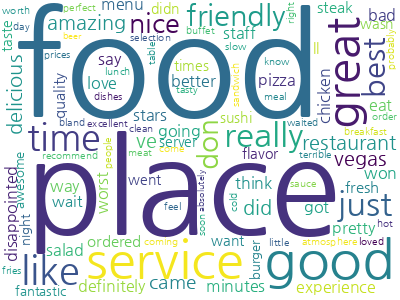

In [31]:
cloud.to_image()

In [32]:
cloud.to_file('save/cloud.png')

# 공기어 네트워크

In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_excel('data/yelp.xlsx')

In [35]:
# min_df=0.01 // 최소 1% 이상의 문서에서 출현한 단어만 포함
# binary=True // 문서에 나타난 단어는 빈도 무관하게 1이 됨

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', min_df=0.01, binary=True)

In [36]:
dtm = cv.fit_transform(df.review)

In [37]:
#인접 행렬(adjacency matrix): 네트워크에서 인접한 점(단어)들의 관계를 행렬로 나타낸 것 문서 단어 행렬을 곱하면 함께 나타난 단어는 1이 되고, 그렇지 않은 단어는 0이 됨.
cooccur = dtm.T @ dtm
adj = cooccur.A

In [38]:
adj

array([[24,  0,  1, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 1,  0, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 19,  0,  0],
       [ 0,  0,  0, ...,  0, 15,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

In [39]:
cv.get_feature_names_out()

array(['amazing', 'atmosphere', 'awesome', 'bad', 'best', 'better',
       'bland', 'breakfast', 'buffet', 'burger', 'came', 'chicken',
       'come', 'coming', 'definitely', 'delicious', 'did', 'didn',
       'disappointed', 'don', 'eat', 'excellent', 'experience',
       'fantastic', 'feel', 'flavor', 'food', 'fresh', 'friendly',
       'going', 'good', 'got', 'great', 'just', 'know', 'like', 'little',
       'll', 'love', 'loved', 'lunch', 'meal', 'menu', 'minutes', 'nice',
       'night', 'order', 'ordered', 'perfect', 'pizza', 'place', 'pretty',
       'prices', 'quality', 'really', 'recommend', 'restaurant', 'salad',
       'say', 'server', 'service', 'slow', 'staff', 'stars', 'steak',
       'sushi', 'taste', 'tasty', 'terrible', 'think', 'time', 'times',
       've', 'vegas', 'wait', 'want', 'wasn', 'way', 'went', 'won',
       'worst', 'worth'], dtype=object)

In [40]:
#각 단어별 빈도
n = np.diag(adj)
n

array([ 24,  11,  12,  17,  29,  16,  11,  10,  11,  10,  20,  14,  11,
        10,  19,  23,  20,  13,  19,  26,  19,  10,  20,  12,  11,  12,
       121,  14,  27,  18,  91,  17,  64,  35,  11,  44,  10,  13,  19,
        10,  10,  10,  15,  16,  25,  11,  11,  14,  10,  14, 103,  19,
        10,  13,  34,  11,  24,  15,  16,  13,  85,  10,  18,  13,  12,
        13,  12,  11,  10,  16,  42,  13,  22,  22,  12,  13,  13,  15,
        13,  19,  15,  10])

In [41]:
#전체 문서
total, _ = dtm.shape
total, _

(1000, 82)

In [42]:
n/total

array([0.024, 0.011, 0.012, 0.017, 0.029, 0.016, 0.011, 0.01 , 0.011,
       0.01 , 0.02 , 0.014, 0.011, 0.01 , 0.019, 0.023, 0.02 , 0.013,
       0.019, 0.026, 0.019, 0.01 , 0.02 , 0.012, 0.011, 0.012, 0.121,
       0.014, 0.027, 0.018, 0.091, 0.017, 0.064, 0.035, 0.011, 0.044,
       0.01 , 0.013, 0.019, 0.01 , 0.01 , 0.01 , 0.015, 0.016, 0.025,
       0.011, 0.011, 0.014, 0.01 , 0.014, 0.103, 0.019, 0.01 , 0.013,
       0.034, 0.011, 0.024, 0.015, 0.016, 0.013, 0.085, 0.01 , 0.018,
       0.013, 0.012, 0.013, 0.012, 0.011, 0.01 , 0.016, 0.042, 0.013,
       0.022, 0.022, 0.012, 0.013, 0.013, 0.015, 0.013, 0.019, 0.015,
       0.01 ])

In [43]:
#향상도 계산
lift = total * adj / np.outer(n, n)
lift

array([[ 41.66666667,   0.        ,   3.47222222, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  90.90909091,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  3.47222222,   0.        ,  83.33333333, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  52.63157895,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         66.66666667,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 100.        ]])

In [44]:
#향상도가 2 이상인 경우는 1, 아니면 0으로 바꿈
m = np.where(lift >= 2, 1, 0)

In [45]:
#대각원소(=행렬에서 대각선 방향의 원소)는 단어의 문서 빈도를 나타내므로 0으로 설정
np.fill_diagonal(m, 0)

# NetworkX로 변환

In [46]:
#Python에서 네트워크 분석을 위한 라이브러리
import networkx as nx

In [47]:
#인접행렬을 네트워크로 바꾸기
net = nx.from_numpy_array(m)
net

In [48]:
#노드 이름을 단어로 바꾸기
words = cv.get_feature_names_out()
net = nx.relabel_nodes(net, dict(enumerate(words)))

In [49]:
#steak와 연결된 단어 보기
list(nx.neighbors(net, 'steak'))

['amazing',
 'atmosphere',
 'best',
 'chicken',
 'did',
 'don',
 'flavor',
 'fresh',
 'great',
 'really',
 'vegas',
 'wasn',
 'worst']

### 중심성

In [50]:
# 네트워크에서 노드의 중요도를 나타내는 지표
# 연결 중심성(degree centrality): 연결된 단어 수 / (전체 단어 수 - 1)
dc = nx.degree_centrality(net)

In [51]:
#매개 중심성(between centrality): 단어-단어 간의 최단 경로에 포함된 비율
bc = nx.betweenness_centrality(net)

#근접 중심성(closeness centrality): 다른 단어와 거리가 평균적으로 짧은 단어
cc = nx.closeness_centrality(net)

#고유벡터 중심성(eigenvector centrality): 중요한 단어와 연결된 단어가 중요한 단어
ec = nx.eigenvector_centrality(net)

In [52]:
#중심성을 데이터 프레임으로 변환
ecf = pd.DataFrame(ec.items(), columns=['word', 'centrality'])

#중심성 순으로 정렬
ecf.sort_values('centrality')

,word,centrality
39,loved,0.026497
63,stars,0.041249
77,way,0.051813
62,staff,0.056761
68,terrible,0.057225
...,...,...
75,want,0.164544
29,going,0.170552
22,experience,0.174456
70,time,0.191572


In [57]:
### 시각화
from pyvis.network import Network

#networkx 네트워크를 pyvis 네트워크로 변환
vis = Network(height='800px', width='1000px')
vis.from_nx(net)

In [60]:
#설정 버튼 추가
vis.show_buttons(filter_=True)

In [67]:
#저장
vis.save_graph('save/nx.html')